# (1) Supervised Learning Algorithms Part 2

In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz

from sklearn import datasets, metrics, tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    multilabel_confusion_matrix, 
    accuracy_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)

from matplotlib.pyplot import figure


In [4]:
path = r'C:\Users\nvak6\Machine Learning with Python'
#Read in the European weather data.
climate = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))
climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [5]:
#Read in the Pleasant weather data.
pw = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pw

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
#Reduce to just temp variables
tv = climate[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max','BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max','DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max','HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max','LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max','MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max','OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max', 'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

In [7]:
# Creatin and X matrix by dropping unneeded columns
X = tv.drop(['DATE', 'MONTH'], axis = 1)
y = pw.drop(['DATE'], axis = 1)

In [8]:
X.shape

(22950, 45)

In [9]:
y.shape

(22950, 15)

In [10]:
#Split into training data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
X_train.shape

(17212, 45)

In [12]:
X_test.shape

(5738, 45)

In [13]:
y_train.shape

(17212, 15)

In [14]:
y_test.shape

(5738, 15)

[Text(0.33550706627361865, 0.984375, 'x[14] <= 17.95\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.07017564695793725, 0.953125, 'x[29] <= 17.95\ngini = 0.099\nsamples = 10778\nvalue = [[10106.0, 672.0]\n[9045.0, 1733.0]\n[9508.0, 1270.0]\n[10688.0, 90.0]\n[10778.0, 0.0]\n[10142.0, 636.0]\n[10697.0, 81.0]\n[9817.0, 961.0]\n[10710.0, 68.0]\n[8023.0, 2755.0]\n[10368.0, 410.0]\n[10511.0, 267.0]\n[10778.0, 0.0]\n[10529.0, 249.0]\n[10616.0, 162.0]]'),
 Text(0.20284135661577796, 0.96875, 'True  '),
 Text(0.019679949776313883, 0.921875, 'x[5] <= 17.95\ngini = 0.028\nsamples = 7558\nvalue = [[7435.0, 123.0]\n[6871.0, 687.0]\n[7205.0, 353.0]\n[7545.0, 13.0]\n[7558.0, 0.0]\n[7519.0, 39.0]\n[7537.0, 21.0]\n[7340.0, 218.0]\n[7536.0, 22.0]\n[7558.0, 0.0]\n[7414.0, 144.0]\n[7524

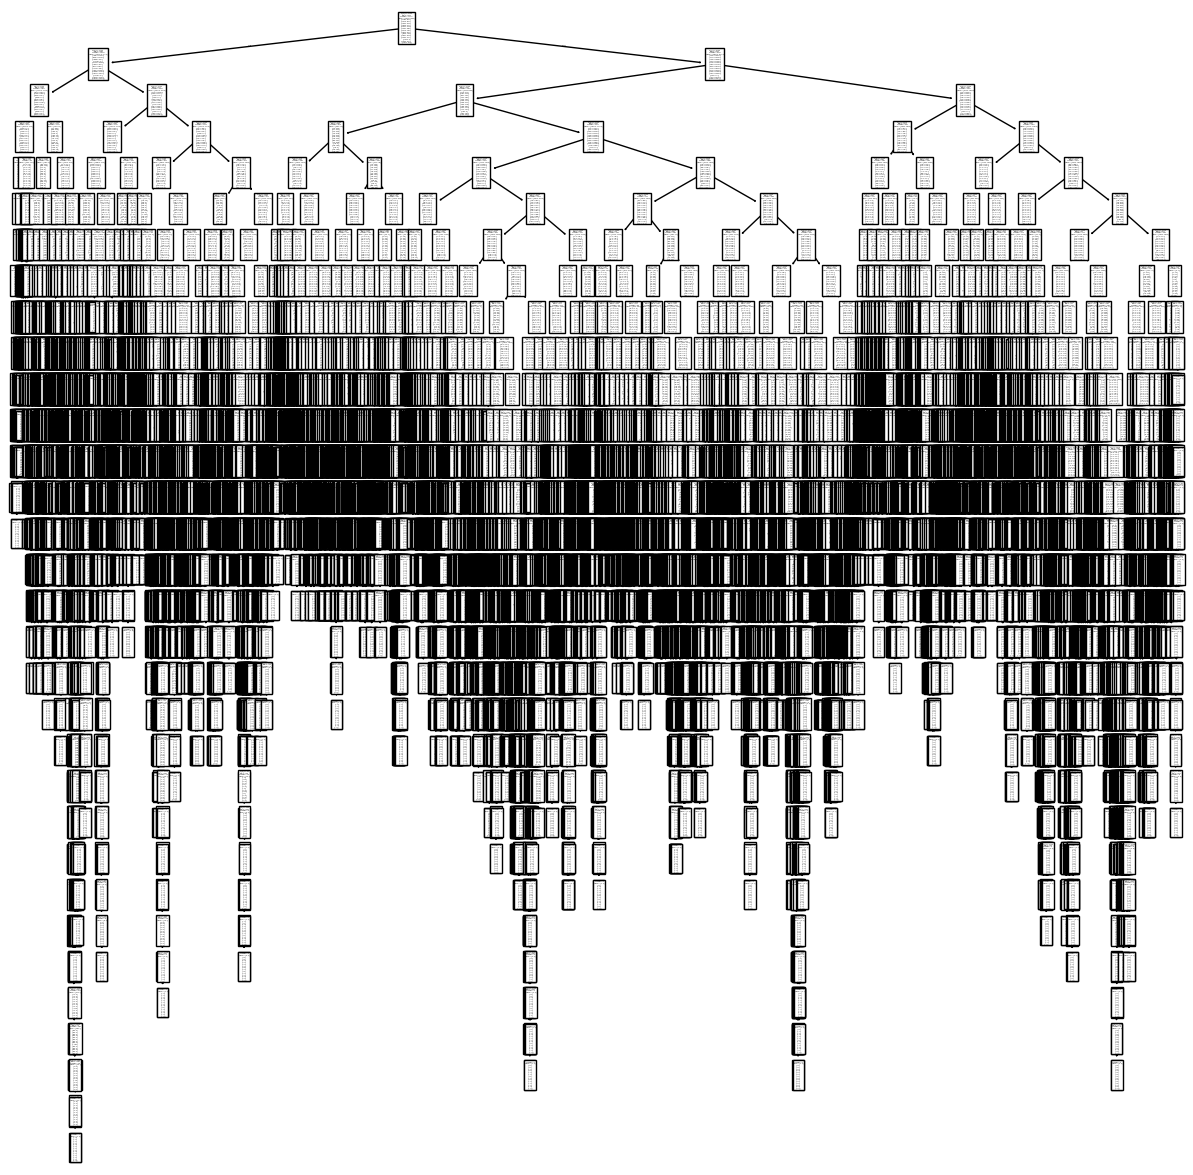

In [15]:
# Run Decision Tree classifier
weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
weather_dt.fit(X_train, y_train)

# Plot the decision tree
figure(figsize=(15, 15))
tree.plot_tree(weather_dt)

In [31]:
# What is the training accuracy score? Using the cross-validation method
y_pred_train = weather_dt.predict(X_train)

# Print the training accuracy score
train_accuracy = cross_val_score(weather_dt, X_train, y_train, cv=3, scoring='accuracy').mean()
print('Train accuracy score:', train_accuracy)


Train accuracy score: 0.46177098554449736


C:\Users\nvak6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


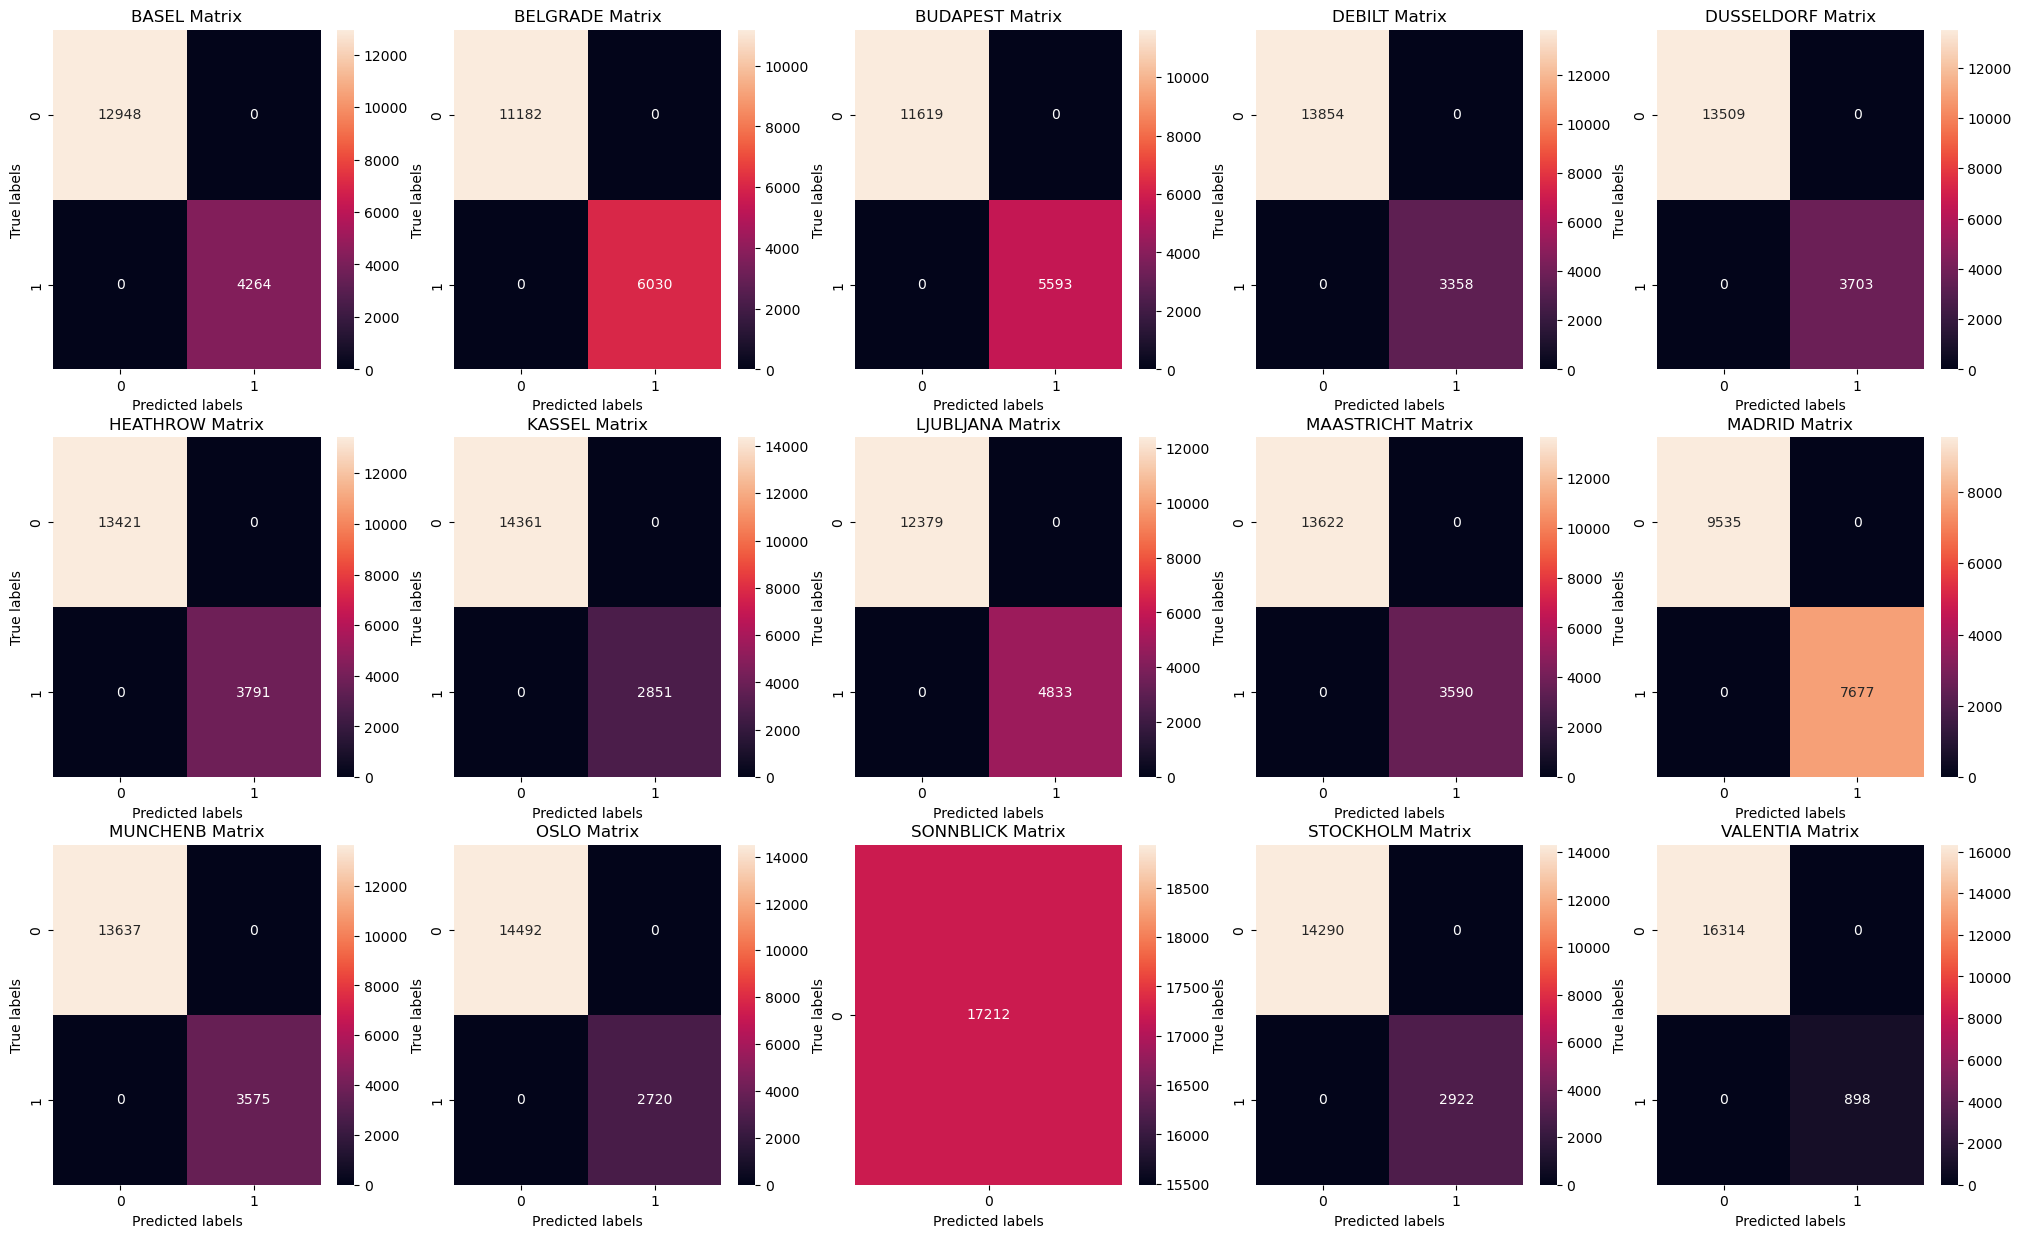

In [47]:
# Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in tv.columns if x not in ["MONTH", "DATE"]})
locations.sort()

# Print locations
locations

key = "_pleasant_weather"
stations = []

# Create subplots for the confusion matrices
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['pleasant', 'unpleasant']
count = 0

# Generate confusion matrices for each location
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:, name + key], y_pred_train[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        
        # Plot confusion matrix
        ax[i, j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])

        # Labels, title, and ticks
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Matrix')
        
      
        count += 1


In [37]:
# Predict the labels for the test data
y_test_pred = weather_dt.predict(X_test)

# Print the test accuracy score
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Test accuracy score:', test_accuracy)

# Generate and display the multilabel confusion matrix
multilabel_confusion_matrix(y_test, y_test_pred)


Test accuracy score: 0.47159288950853956


array([[[3870,  468],
        [ 453,  947]],

       [[3168,  608],
        [ 530, 1432]],

       [[3399,  501],
        [ 496, 1342]],

       [[4292,  345],
        [ 369,  732]],

       [[4093,  414],
        [ 379,  852]],

       [[4108,  462],
        [ 413,  755]],

       [[4482,  333],
        [ 302,  621]],

       [[3661,  534],
        [ 444, 1099]],

       [[4167,  395],
        [ 370,  806]],

       [[2809,  359],
        [ 391, 2179]],

       [[4152,  394],
        [ 369,  823]],

       [[4527,  352],
        [ 336,  523]],

       [[5738,    0],
        [   0,    0]],

       [[4437,  329],
        [ 377,  595]],

       [[5297,  165],
        [ 176,  100]]], dtype=int64)

C:\Users\nvak6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


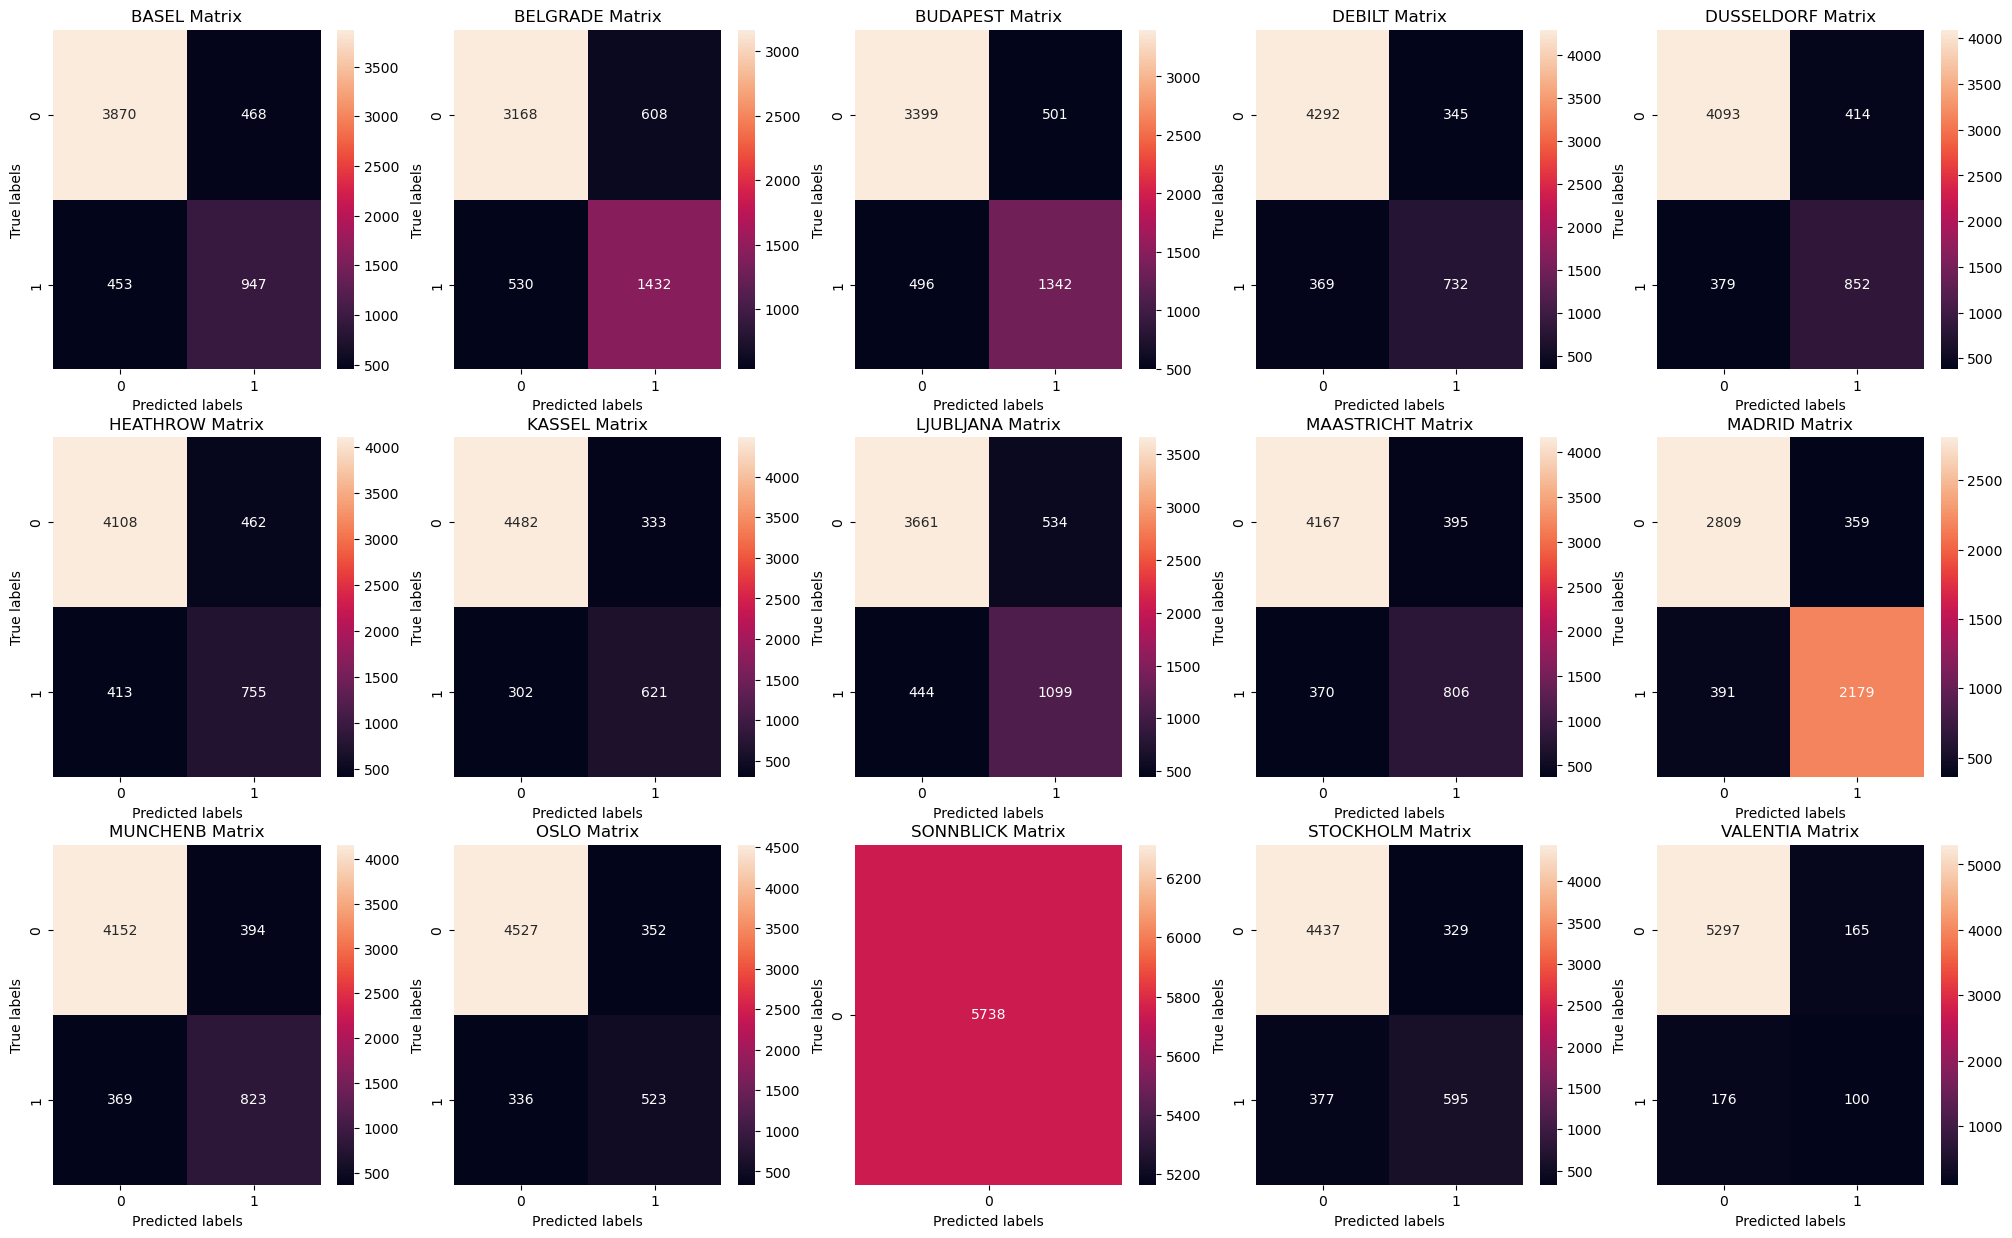

In [45]:
# Confusion matrix based on the last "k" in the sequence (Test data)
locations = list({x.split("_")[0] for x in tv.columns if x not in ["MONTH", "DATE"]})
locations.sort()

# Print locations
locations

key = "_pleasant_weather"
stations = []

# Predict the labels for the test data
y_pred_test = weather_dt.predict(X_test)

# Create subplots for the confusion matrices
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['pleasant', 'unpleasant']
count = 0

# Generate confusion matrices for each location
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:, name + key], y_pred_test[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        
        # Plot confusion matrix
        ax[i, j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])

        # Labels, title, and ticks
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Matrix')
        
      

        count += 1
